# 如何让分布更直观
## 单变量分布

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

### 灰度图
最方便快捷的方式~

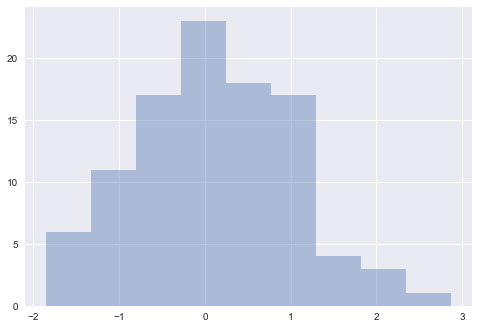

In [2]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False)

想得到更精细的刻画？调节bins~

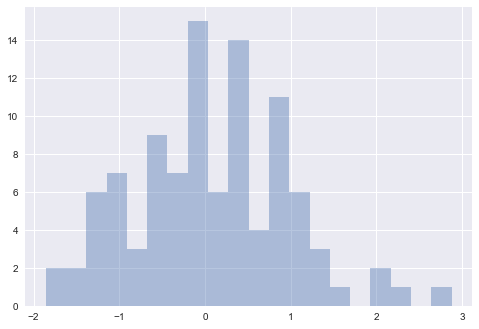

In [3]:
sns.distplot(x, kde=False, bins=20)

想配合着实例一起看？

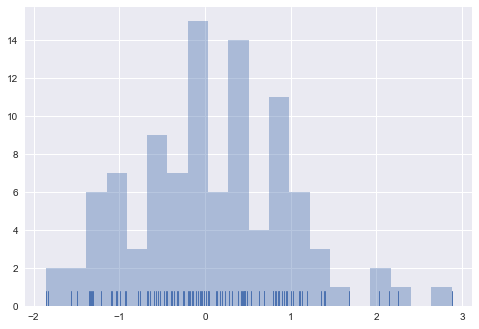

In [4]:
sns.distplot(x, kde=False, bins=20, rug=True)

配合着实例一起看有什么好处？指导你设置合适的bins。

### 核密度估计(KDE)
通过观测估计概率密度函数的形状。
有什么用呢？待定系数法求概率密度函数~

核密度估计的步骤：
* 每一个观测附近用一个正态分布曲线近似
* 叠加所有观测的正太分布曲线
* 归一化

在seaborn中怎么画呢？

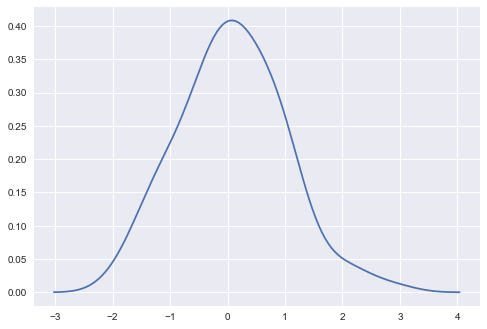

In [5]:
sns.kdeplot(x)

* bandwidth的概念：用于近似的正态分布曲线的宽度
* bandwidth越大，曲线越平缓

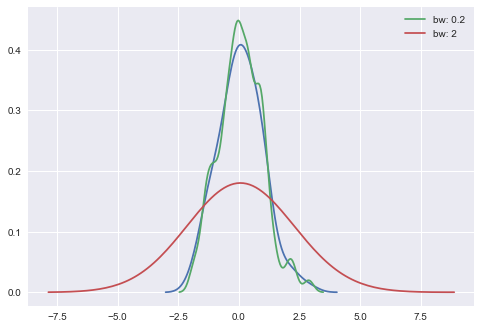

In [6]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

### 模型参数拟合

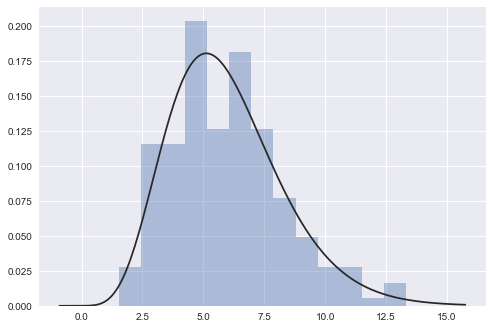

In [7]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

## 双变量分布

In [9]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

两个相关的正态分布~
### 散点图

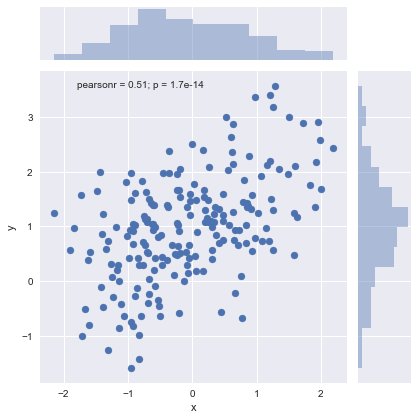

In [10]:
sns.jointplot(x="x", y="y", data=df)

### 六角箱图

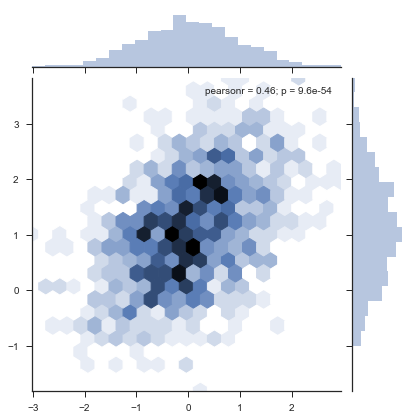

In [11]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("ticks"):
    sns.jointplot(x=x, y=y, kind="hex")

### 核密度估计

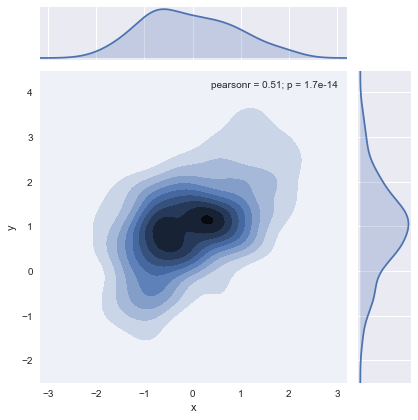

In [12]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

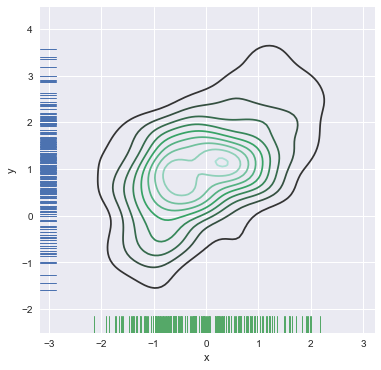

In [13]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax, shade=False)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

想看到更连续梦幻的效果~

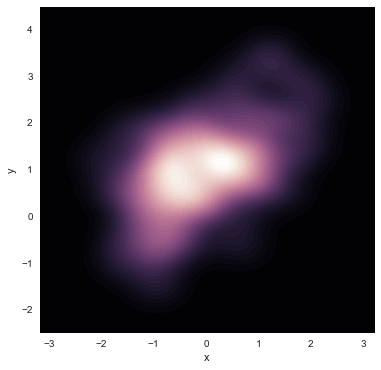

In [14]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

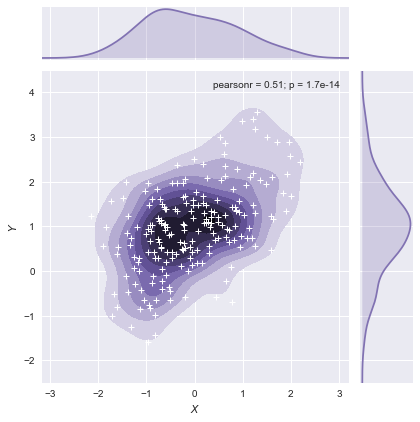

In [15]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

## 数据集中的两两关系

In [16]:
iris = sns.load_dataset("iris") # 鸢尾花数据库
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


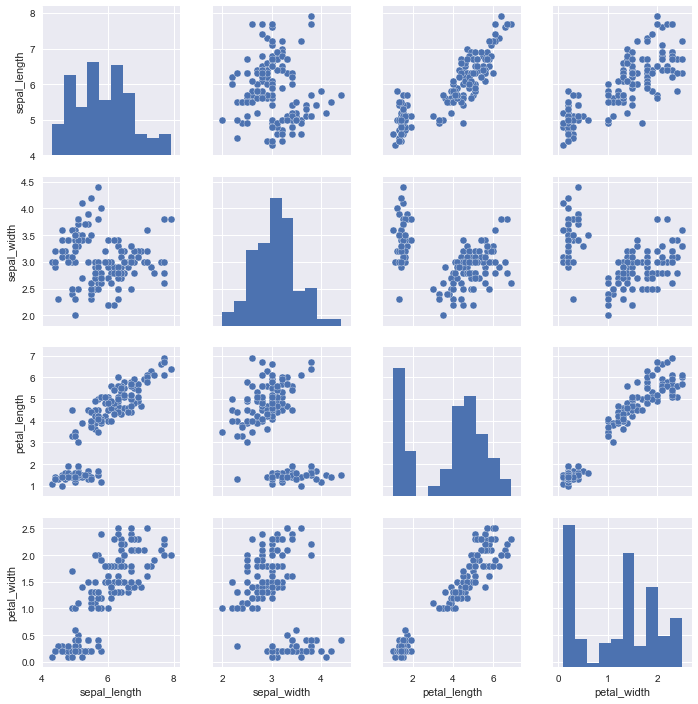

In [17]:
sns.pairplot(iris)

属性两两间的关系 + 属性的灰度图

/Library/Python/2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


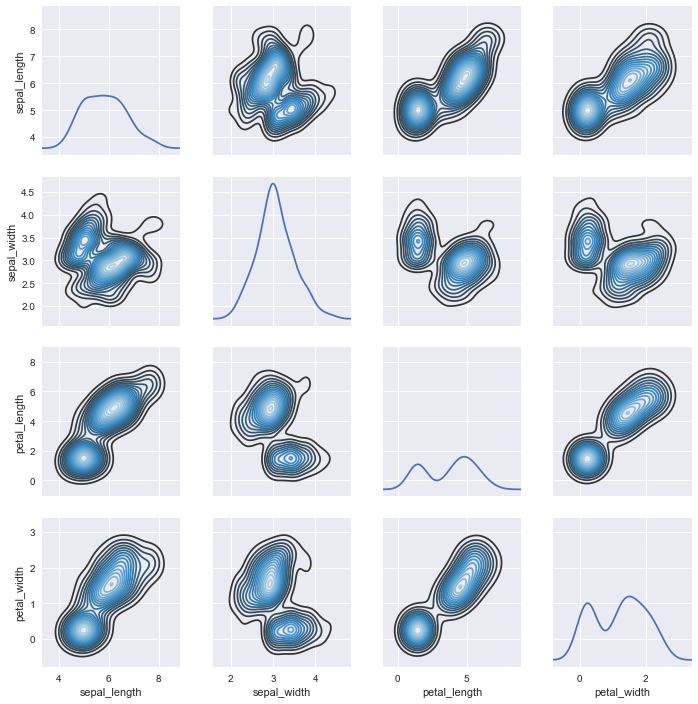

In [18]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=20)

## 小结
* distplot(bins, rug)
* kdeplot(bw, fit)
* joinplot(kind)
* pairplot